In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../adiabatic-tides")
sys.path.append("..")

import adiabatic_tides as at
#import cusp_encounters.milkyway
import cusp_encounters.encounters_math as em
import cusp_encounters.cusp_distribution

%load_ext autoreload
cachedir = "../caches"

G = 43.0071057317063e-4 # pc (km/s)^2 / Msol 

In [2]:
cuspdis = cusp_encounters.cusp_distribution.CuspDistribution(cachedir=cachedir)

Calculated kfs = 1.06656e+06
Not yet using this value


In [3]:
# Takes about 12 minutes on first execution
cusps = cuspdis.sample_cusps(10000000)

Warning, I have to insert the correct WIMP fmax for m!=100mev here


# Power Spectrum

Text(0.5, 1.0, 'Power spectrum z=31')

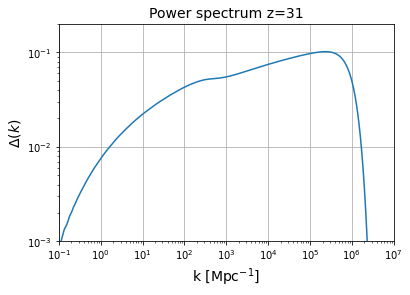

In [4]:
plt.loglog(cuspdis.k, cuspdis.Dk_cdm/(1.+31.)**2)
plt.xlim(1e-1,1e7)
plt.ylim(1e-3, 2e-1)
plt.grid("on")
plt.xlabel(r"k [Mpc$^{-1}$]", fontsize=14)
plt.ylabel(r"$\Delta (k)$", fontsize=14)
plt.title("Power spectrum z=31", fontsize=14)

# Some informative numbers (compare Delos & White 2022, Fig. 1)

In [5]:
sel = cusps["valid"] & (cusps["acoll"] < 1.)
mtot = np.sum(cusps["Mcusp"][sel])
nallpos = len(cusps["Mcusp"])
H0 = 68.7
Gmpc = 43.0071057317063 * 1e-10
rho0 = 3.*H0**2 / (8.*np.pi*Gmpc) * (cuspdis.cosmology["omega_cdm"])

mdm = rho0 * (nallpos / cuspdis.ps.ntot_positive)
print("cusp mass fraction", (mtot/mdm))

print("cusp number per mass", np.sum(sel)/mdm)
print("Jcusps/Mdm", np.sum(cusps["J"][sel])/mdm)
print("fraction valid: %.3f" % np.mean(cusps["valid"]))

cusp mass fraction 0.03494936791989392
cusp number per mass 40012.79360844739
Jcusps/Mdm 0.1806259414120276
fraction valid: 0.468


# Recreate Figure 6 from Delos & White
https://arxiv.org/pdf/2209.11237.pdf

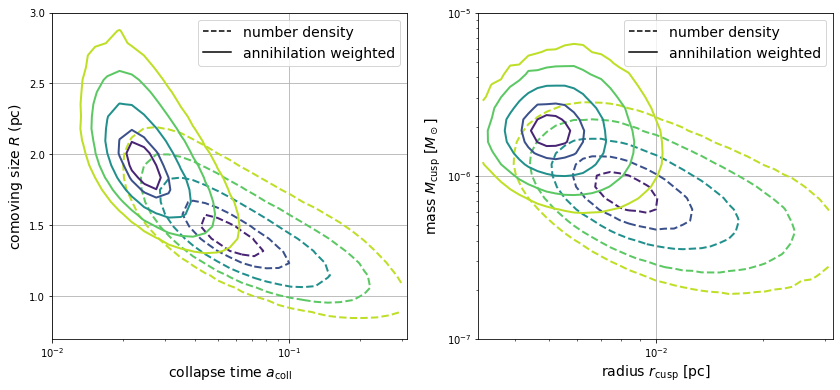

In [6]:
acoll, R, valid, rcusp, Mcusp = cusps["acoll"], cusps["R"], cusps["valid"], cusps["rcusp"], cusps["Mcusp"]
    
fig, axs = plt.subplots(1,2, figsize=(14,6))

bins_acoll = np.logspace(-2,-0.5,30)
bins_R = np.linspace(0.5, 3.,30)
#axs[0].hist2d(acoll[valid], R[valid]*1e6, bins=(bins_acoll, bins_R));
em.plot_contour_hist(acoll[valid], R[valid], ax=axs[0], bins=(bins_acoll, bins_R), logx=True, linestyles="dashed")
em.plot_contour_hist(acoll[valid], R[valid], ax=axs[0], bins=(bins_acoll, bins_R), logx=True, weights=cusps["J"][valid])

bins_rcusp = np.logspace(-2.5, -1.5,40)
bins_Mcusp = np.logspace(-7, -5.,30)
#axs[1].hist2d(rcusp[valid]*1e6, Mcusp[valid], bins=(bins_rcusp, bins_Mcusp));
em.plot_contour_hist(rcusp[valid], Mcusp[valid], ax=axs[1], bins=(bins_rcusp, bins_Mcusp), logx=True, logy=True, linestyles="dashed")
em.plot_contour_hist(rcusp[valid], Mcusp[valid], ax=axs[1], bins=(bins_rcusp, bins_Mcusp), logx=True, logy=True, weights=cusps["J"][valid])

axs[0].set_xlim(bins_acoll[0], bins_acoll[-1])
axs[0].set_ylim(0.7, bins_R[-1])

axs[1].set_xlim(bins_rcusp[0], bins_rcusp[-1])
axs[1].set_ylim(bins_Mcusp[0], bins_Mcusp[-1])

axs[0].set_xlabel(r"collapse time $a_{\rm{coll}}$", fontsize=14)
axs[0].set_ylabel(r"comoving size $R$ (pc)", fontsize=14)

axs[1].set_ylabel(r"mass $M_{\rm{cusp}}$ [$M_\odot$]", fontsize=14)
axs[1].set_xlabel(r"radius $r_{\rm{cusp}}$ [pc]", fontsize=14)

for ax in axs:
    ax.plot([], color="black", linestyle="dashed", label="number density")
    ax.plot([], color="black", linestyle="solid", label="annihilation weighted")
    ax.legend(fontsize=14)
    ax.grid("on")

plt.savefig("img/cusp_distribution.pdf", bbox_inches="tight")

# Other distribution representaitions

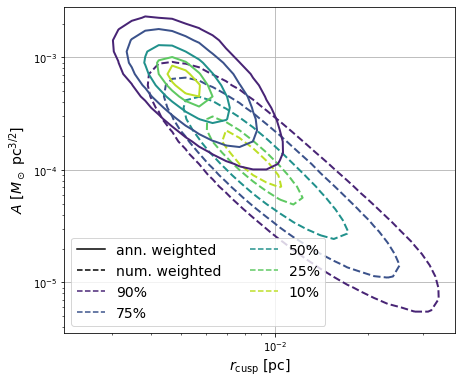

In [7]:
A, rcusp, valid, rcore = cusps["A"], cusps["rcusp"], cusps["valid"], cusps["rcore"]

fig, ax = plt.subplots(1,1, figsize=(7,6))

bins_A = np.logspace(-5.5,-2.5,31)
bins_rcusp = np.logspace(np.log10(2e-3),np.log10(4e-2),31)
#axs[0].hist2d(acoll[valid], R[valid]*1e6, bins=(bins_acoll, bins_R));

ax.plot([], color="black", linestyle="solid", label="ann. weighted")
ax.plot([], color="black", linestyle="dashed", label="num. weighted")

em.plot_contour_hist(rcusp[valid], A[valid], ax=ax, bins=(bins_rcusp, bins_A), logx=True, linestyles="dashed", cmap="viridis", labels=True)
em.plot_contour_hist(rcusp[valid], A[valid], ax=ax, bins=(bins_rcusp, bins_A), logx=True, weights=cusps["J"][valid], cmap="viridis")
ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlabel(r"$r_{\rm{cusp}}$ [pc]", fontsize=14)
ax.set_ylabel(r"$A$ [$M_\odot$ pc$^{3/2}$]", fontsize=14)


ax.legend(fontsize=14, loc="lower left", ncol=2)
ax.grid("on")

plt.savefig("img/cusp_A_vs_rcusp.pdf", bbox_inches="tight")

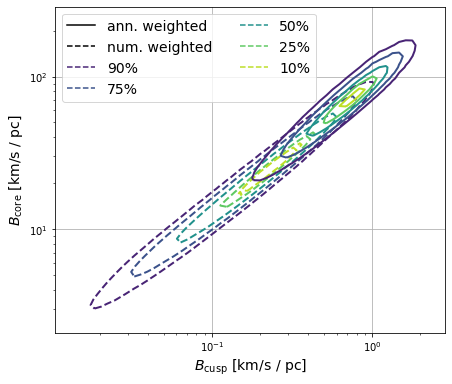

In [8]:
G = 43.0071057317063e-4
A, rcusp, valid, rcore = cusps["A"], cusps["rcusp"], cusps["valid"], cusps["rcore"]

fig, ax = plt.subplots(1,1, figsize=(7,6))

Bcore =  np.sqrt((8. * np.pi * A * G) / rcore**(1.5)*3.)
Bcusp =  np.sqrt((8. * np.pi * A * G) / rcusp**(1.5)*3.)

bins_Bcusp = np.logspace(-2.,np.log10(3),61)
bins_Bcore = np.logspace(np.log10(2e0),np.log10(3e2),61)
#axs[0].hist2d(acoll[valid], R[valid]*1e6, bins=(bins_acoll, bins_R));

ax.plot([], color="black", linestyle="solid", label="ann. weighted")
ax.plot([], color="black", linestyle="dashed", label="num. weighted")

em.plot_contour_hist(Bcusp[valid], Bcore[valid], ax=ax, bins=(bins_Bcusp, bins_Bcore), logx=True, linestyles="dashed", cmap="viridis", labels=True)
em.plot_contour_hist(Bcusp[valid], Bcore[valid], ax=ax, bins=(bins_Bcusp, bins_Bcore), logx=True, weights=cusps["J"][valid], cmap="viridis")
ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlabel(r"$B_{\rm{cusp}}$ [km/s / pc]", fontsize=14)
ax.set_ylabel(r"$B_{\rm{core}}$ [km/s / pc]", fontsize=14)


ax.legend(fontsize=14, loc="upper left", ncol=2)

plt.savefig("img/cusp_Bcusp_vs_Bcore.pdf", bbox_inches="tight")